## **Introduction**

Sentiment analysis is a vital aspect of natural language processing (NLP) that helps interpret emotions, opinions, and attitudes in text data. While it has seen significant advancements in resource-rich languages like English, there is still a notable gap in African languages, which are often underrepresented in the NLP field.

This project focuses on **Amharic**, a Semitic language spoken by over 32 million people primarily in Ethiopia. As a low-resource language, Amharic poses unique challenges for NLP, including limited datasets, non-Latin script (Ge'ez), and the agglutinative nature of its grammar. The objective of this work is to develop a sentiment analysis model capable of determining whether text in Amharic expresses positive, negative, or neutral sentiment. This endeavor not only advances NLP research in Amharic but also contributes to the broader field of computational linguistics for African languages.

### **Data Sources**

The dataset used for this project comprises both curated and publicly available Amharic text sources. These texts encompass a diverse range of topics, from news articles to domain-specific opinions, ensuring a balanced representation of sentiments in the language.

1. **Kaggle Dataset**  
   Title: *An Amharic News Text Classification Dataset*  
   Authors: *Israel Abebe Azime and Nebil Mohammed*  
   Description: This dataset contains Amharic news text classified by categories, offering a foundation for preprocessing and adapting to sentiment analysis tasks.

2. **News Articles Dataset**  
   A collection of over 50,706 articles aggregated from major Amharic news platforms. These include reputable sources such as:  
   - **Addis Admas** (1,839 articles) - [addisadmassnews.com](http://www.addisadmassnews.com)  
   - **Addis Maleda** (847 articles) - [addismaleda.com](http://www.addismaleda.com)  
   - **BBC Amharic** (816 articles) - [bbc.com/amharic](https://www.bbc.com/amharic/)  
   - **VOA Amharic** (6,943 articles) - [amharic.voanews.com](https://amharic.voanews.com)  
   - **Soccer Ethiopia** (8,595 articles) - [soccerethiopia.net](https://soccerethiopia.net)  
   - ...and others, with each contributing valuable content across various domains, including politics, sports, and entertainment.  

   Classes/topics being discussed include:
   - Local News
   - International News
   - Business
   - Entertainment
   - Sports
   - Politics



### 1. Loading required data/libraries, and EDA


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
#os.environ["CUDA_VISIBLE_DEVICES"] = "" # disables GPU and switches to CPU for debugging if needed

import matplotlib
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from transformers import AutoTokenizer, AutoModelForSequenceClassification


np.random.seed(333)

In [ ]:
data = pd.read_csv('/content/Amharic News Dataset.csv')

data = shuffle(data)
data.head()

,headline,category,date,views,article,link
12120,ጠቅላይ ሚኒስትር ዐብይ መከላከያ ሚንስትርነትን ጨምሮ አዳዲስ ሹመቶችን ሰጡ,ሀገር አቀፍ ዜና,18 ነሐሴ 2020,Unknown,ጠቅላይ ሚኒስትር ዐብይ አህመድ በዛሬው ዕለት አዳዲስ አስር ሹመቶችን ሰጥ...,https://www.bbc.com/amharic/news-53816680
1804,በቅኝ ከተገዙት በምን ተሻልን?,መዝናኛ,"March 6, 2019",23,ጋዜጠኛ፡-\n‹‹የዓድዋ ጦርነት በማንና በማን መካከል የተካሄደ ጦርነት ነ...,https://www.press.et/Ama/?p=6282
14475,ፍርድ ቤቱ አቶ ልደቱ አያሌው መከላከያ ማስረጃ እንዲያቀርቡ ብይን ሰጠ,ሀገር አቀፍ ዜና,"Nov 5, 2020",790,አዲስ አበባ፣ ጥቅምት 26፣ 2013 (ኤፍ.ቢ.ሲ) አቶ ልደቱ አያሌው በተ...,https://www.fanabc.com/%e1%8d%8d%e1%88%ad%e1%8...
12805,ኢትዮጵያ እና ሕንድ ግንኙነታቸውን ለማጎልበት በሚያስችሉ ጉዳዮች ዙሪያ ተወያዩ,ሀገር አቀፍ ዜና,"Jan 5, 2021",162,አዲስ አበባ፣ታህሳስ 27፣2013 (ኤፍ.ቢ.ሲ) በሕዝብ ተወካዮች ምክር ቤ...,https://www.fanabc.com/%e1%8a%a2%e1%89%b5%e1%8...
8076,ሰው የመሆን ልኬት እንዳይታጣ!,ፖለቲካ,2021-01-04,252,ሰውነት በአካል ከሚታየው መገለጫውና መታወቂያው ባለፈ በሰብአዊነት ሚዛን ...,https://addismaleda.com/archives/13487


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21701 entries, 12120 to 8172
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  21689 non-null  object
 1   category  21701 non-null  object
 2   date      21701 non-null  object
 3   views     21701 non-null  object
 4   article   21701 non-null  object
 5   link      21700 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [ ]:
data = data.dropna(subset=['article'])

In [ ]:
data['link'].value_counts()

,count
link,
https://www.fanabc.com/%e1%8b%a8%e1%8a%a2%e1%89%b5%e1%8b%ae%e1%8c%b5%e1%8b%ab%e1%8a%93-%e1%8b%b0%e1%89%a1%e1%89%a5-%e1%8a%a0%e1%8d%8d%e1%88%aa%e1%8a%ab-%e1%8b%a8%e1%8a%95%e1%8c%8d%e1%8b%b5%e1%8a%93-%e1%8a%a2%e1%8a%95/,2
https://www.fanabc.com/%e1%89%a0%e1%8a%a0%e1%88%9b%e1%88%ab-%e1%8a%ad%e1%88%8d%e1%88%8d-%e1%88%9d%e1%88%a5%e1%88%ab%e1%89%85-%e1%8c%8e%e1%8c%83%e1%88%9d-%e1%8b%9e%e1%8a%95-%e1%8a%a823-%e1%88%9a%e1%88%8a%e1%8b%a8%e1%8a%95/,2
https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%88%9b%e1%88%ab-%e1%8a%ad%e1%88%8d%e1%88%8d-%e1%8c%88%e1%89%a2%e1%8b%8e%e1%89%bd-%e1%89%a2%e1%88%ae-%e1%8b%a81-%e1%89%a2%e1%88%8a%e1%8b%a8%e1%8a%95-%e1%89%a5%e1%88%ad-%e1%8b%a8/,2
https://www.fanabc.com/10%e1%8a%9b%e1%8b%8d-%e1%8b%a8%e1%8a%a0%e1%8b%b2%e1%88%b5-%e1%8a%a0%e1%89%a0%e1%89%a3-%e1%8a%a8%e1%89%b0%e1%88%9b-%e1%8b%a8%e1%89%b4%e1%8a%ad%e1%8a%92%e1%8a%ad%e1%8a%93-%e1%88%99%e1%8b%ab-%e1%88%b3/,2
https://www.fanabc.com/%e1%8a%a0%e1%89%b6-%e1%8a%a0%e1%8b%b2%e1%88%b1-%e1%8a%a0%e1%88%a8%e1%8c%8b%e1%8a%93-%e1%8b%a8%e1%88%b5%e1%8d%96%e1%88%ad%e1%89%b5-%e1%89%a4%e1%89%b0%e1%88%b0%e1%89%a6%e1%89%bd-%e1%88%b1%e1%88%89/,2
...,...
https://www.ethiopianreporter.com/article/18520,1
https://www.addisadmassnews.com/index.php?option=com_k2&view=item&id=18150:%E2%80%9C%E1%89%BB%E1%8B%AD%E1%88%8D%E1%8B%B5-%E1%8D%88%E1%8A%95%E1%8B%B5%E2%80%9D-%E1%89%A0%E1%8B%B5%E1%88%AD%E1%89%81-%E1%8A%A5%E1%8B%AB%E1%8A%A8%E1%8A%93%E1%8B%88%E1%8A%90-%E1%8B%AB%E1%88%88%E1%8B%8D-%E1%8B%B5%E1%8C%8B%E1%8D%8D&Itemid=240,1
https://www.fanabc.com/%e1%8b%a8%e1%8a%a6%e1%88%ae%e1%88%9a%e1%8b%ab-%e1%8a%a0%e1%88%ab%e1%89%b5-%e1%8b%9e%e1%8a%96%e1%89%bd-%e1%88%88%e1%88%98%e1%8a%a8%e1%88%8b%e1%8a%a8%e1%8b%ab-%e1%88%b0%e1%88%ab%e1%8b%8a%e1%89%b5-705/,1


In [ ]:
data.category.unique()

array(['ሀገር አቀፍ ዜና', 'መዝናኛ', 'ፖለቲካ', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'ስፖርት'],
      dtype=object)

In [ ]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
12120,ጠቅላይ ሚኒስትር ዐብይ መከላከያ ሚንስትርነትን ጨምሮ አዳዲስ ሹመቶችን ሰጡ,ሀገር አቀፍ ዜና,18 ነሐሴ 2020,Unknown,ጠቅላይ ሚኒስትር ዐብይ አህመድ በዛሬው ዕለት አዳዲስ አስር ሹመቶችን ሰጥ...,https://www.bbc.com/amharic/news-53816680,223
1804,በቅኝ ከተገዙት በምን ተሻልን?,መዝናኛ,"March 6, 2019",23,ጋዜጠኛ፡-\n‹‹የዓድዋ ጦርነት በማንና በማን መካከል የተካሄደ ጦርነት ነ...,https://www.press.et/Ama/?p=6282,815
14475,ፍርድ ቤቱ አቶ ልደቱ አያሌው መከላከያ ማስረጃ እንዲያቀርቡ ብይን ሰጠ,ሀገር አቀፍ ዜና,"Nov 5, 2020",790,አዲስ አበባ፣ ጥቅምት 26፣ 2013 (ኤፍ.ቢ.ሲ) አቶ ልደቱ አያሌው በተ...,https://www.fanabc.com/%e1%8d%8d%e1%88%ad%e1%8...,136
12805,ኢትዮጵያ እና ሕንድ ግንኙነታቸውን ለማጎልበት በሚያስችሉ ጉዳዮች ዙሪያ ተወያዩ,ሀገር አቀፍ ዜና,"Jan 5, 2021",162,አዲስ አበባ፣ታህሳስ 27፣2013 (ኤፍ.ቢ.ሲ) በሕዝብ ተወካዮች ምክር ቤ...,https://www.fanabc.com/%e1%8a%a2%e1%89%b5%e1%8...,231
8076,ሰው የመሆን ልኬት እንዳይታጣ!,ፖለቲካ,2021-01-04,252,ሰውነት በአካል ከሚታየው መገለጫውና መታወቂያው ባለፈ በሰብአዊነት ሚዛን ...,https://addismaleda.com/archives/13487,1257


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21701 entries, 12120 to 8172
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  21689 non-null  object
 1   category  21701 non-null  object
 2   date      21701 non-null  object
 3   views     21701 non-null  object
 4   article   21701 non-null  object
 5   link      21700 non-null  object
 6   word_len  21701 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
data.word_len.mean()

284.06497396433343

## 2. Text Preprocessing
This section cleans, normalizes and preprocesses the raw Amharic text data. Tasks include:

- Standardizing different character variations that represent the same sound
- Removing special characters or punctuation that might interfere with model performance.
- Tokenizing text into smaller units (words or phrases).
- Encoding the text for compatibility with machine learning models.


#### 2.1 Character level normalization

- Amharic has characters which have the same sound that can be interchangably used.

- An example would be letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' , which have the same sound so we change them to 'ሀ'

In [ ]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)

    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48


#### 2.2 Removing Special Characters

In [ ]:
data['article'] = data['article'].str.replace('[^\w\s]','')

#### 2.3 Normalizing character-level mismatches in the input text
- Unifies different character representations for the same sound (e.g., different fonts, diacritics).
- Corrects typos or errors in the text.
- Standardizing the text format (e.g., removing extra spaces, converting to lowercase).

In [ ]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

#### 2.4 Tokenization

In [ ]:
# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
data['tokens'] = data['article'].apply(nltk.word_tokenize)

print(data[['article', 'tokens']].head())  # Compare original and cleaned text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                 article  \
12120  ጠቅላይ ሚኒስትር አብይ አህመድ በዛሬው እለት አዳዲስ አስር ሹመቶችን ሰጥ...   
1804   ጋዜጠኛ፡-\n‹‹የአድዋ ጦርነት በማንና በማን መካከል የተካሄደ ጦርነት ነ...   
14475  አዲስ አበባ፣ ጥቅምት 26፣ 2013 (ኤፍ.ቢ.ሲ) አቶ ልደቱ አያሌው በተ...   
12805  አዲስ አበባ፣ታህሳስ 27፣2013 (ኤፍ.ቢ.ሲ) በህዝብ ተወካዮች ምክር ቤ...   
8076   ሰውነት በአካል ከሚታየው መገለጫውና መታወቂያው ባለፈ በሰብአዊነት ሚዛን ...   

                                                  tokens  
12120  [ጠቅላይ, ሚኒስትር, አብይ, አህመድ, በዛሬው, እለት, አዳዲስ, አስር,...  
1804   [ጋዜጠኛ፡-, ‹‹የአድዋ, ጦርነት, በማንና, በማን, መካከል, የተካሄደ,...  
14475  [አዲስ, አበባ፣, ጥቅምት, 26፣, 2013, (, ኤፍ.ቢ.ሲ, ), አቶ,...  
12805  [አዲስ, አበባ፣ታህሳስ, 27፣2013, (, ኤፍ.ቢ.ሲ, ), በህዝብ, ተ...  
8076   [ሰውነት, በአካል, ከሚታየው, መገለጫውና, መታወቂያው, ባለፈ, በሰብአዊ...  


#### 2.5 Train and Test Sets, Different tokenization using the Hugging Face Transformers library

In [ ]:
# Splitting Data
X = data['article']
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Tokenization
!pip install huggingface_hub
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Davlan/xlm-roberta-base-finetuned-amharic")

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512, return_tensors="pt")
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512, return_tensors="pt")


Training set size: 17360
Testing set size: 4341


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/356 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

- Data Splitting: The data (data['article']) is split into training and testing sets using an 80:20 split ratio. X contains the articles, and y contains the labels (category).
- Hugging Face Transformers is then installed, which provides pre-trained models and tokenizers.
- Tokenization bit converts raw text into tokenized input sequences, truncating longer inputs and padding shorter ones, ensuring consistent input sizes.

--------------------------------------------------------------------------------


## 3. Building the Sentiment Analysis Model
**Origins:**

- Base Model (xlm-roberta-base): This model is built upon the `XLM-RoBERTa` architecture, which is a powerful multilingual language model developed by Facebook AI. `XLM-RoBERTa` is trained on a massive dataset of text and code in multiple languages, making it capable of understanding and generating text in various languages.
- Fine-tuning (Davlan): The base `XLM-RoBERTa` model was further fine-tuned by a researcher or organization named "Davlan" specifically for the Amharic language. This fine-tuning process involved training the model on an Amharic dataset to adapt it to the nuances of the language. This specialization makes the model more accurate and effective for tasks involving Amharic text.
- Hugging Face Hub: The fine-tuned model is hosted on the Hugging Face Model Hub, a platform for sharing and discovering pre-trained NLP models. This makes it easily accessible for researchers and developers to use in their projects.

**Use case:**
- This fine-tuned model is specifically designed for sentiment analysis in Amharic. It can be used to determine whether a given Amharic text expresses positive, negative, or neutral sentiment. This capability is valuable for various applications.
- In summary, the `Davlan/xlm-roberta-base-finetuned-amharic` model is a powerful resource for processing Amharic text. It leverages the strengths of `XLM-RoBERTa` and specialized fine-tuning to provide accurate sentiment analysis and enable other NLP applications in this under-resourced language.

In [ ]:
# Create a dictionary mapping category names to numerical labels
labels_dict = {
    'ስፖርት': 0,
    'መዝናኛ': 1,
    'ሀገር አቀፍ ዜና': 2,
    'ቢዝነስ': 3,
    'ዓለም አቀፍ ዜና': 4,
    'ፖለቲካ': 5
    # Instead of assigning 'nan': 6, remove rows with NaN in 'category'
}
model = AutoModelForSequenceClassification.from_pretrained("Davlan/xlm-roberta-base-finetuned-amharic", num_labels=len(labels_dict))


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at Davlan/xlm-roberta-base-finetuned-amharic and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


- Loads a pre-trained model (Davlan/xlm-roberta-base-finetuned-amharic) for text classification with three output labels (Negative, Neutral, Positive).
--------------------------------------------------------------------------------

## 4. Training the Model
- The model is trained on the preprocessed training data. During training, the model learns to associate Amharic text patterns with corresponding sentiment labels. A validation step monitors performance to prevent overfitting.

In [ ]:
# Create a dictionary mapping category names to numerical labels
labels_dict = {
    'ስፖርት': 0,
    'መዝናኛ': 1,
    'ሀገር አቀፍ ዜና': 2,
    'ቢዝነስ': 3,
    'ዓለም አቀፍ ዜና': 4,
    'ፖለቲካ': 5
    # Instead of assigning 'nan': 6, remove rows with NaN in 'category'
}

!pip install datasets
from datasets import Dataset, DatasetDict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Import TrainingArguments and Trainer
from transformers import TrainingArguments, Trainer, AutoTokenizer, AutoModelForSequenceClassification # Import TrainingArguments and Trainer
from sklearn.metrics import accuracy_score

# Prepare data
# 1. Drop rows with NaN in 'category' column
data = data.dropna(subset=['category'])
texts = data['article'].fillna("unknown").tolist()
labels = data['category'].map(labels_dict).tolist()

# Create a Hugging Face Dataset
dataset = Dataset.from_pandas(data[['article', 'category']])  # Assuming 'data' is your DataFrame

# Split the dataset into train and validation sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# Rename the 'category' column to 'label'
dataset = dataset.rename_column("category", "label")

# Convert labels to numerical values using labels_dict
def map_labels(example):
    example['label'] = labels_dict[example['label']]
    return example

dataset = dataset.map(map_labels)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["article"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Setting the format and creating your training arguments:
train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))  # Example size
val_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(200))  # Using 'test' as validation set
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Training Arguements
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
)
# Training model
trainer = Trainer(
    model=model,  # Use the model loaded with correct num_labels
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=lambda p: {"accuracy": accuracy_score(p.label_ids, p.predictions.argmax(-1))}
)

# Evaluation
metrics = trainer.evaluate()
print(f"Accuracy: {metrics['eval_accuracy']:.4f}")


Map:   0%|          | 0/17360 [00:00<?, ? examples/s]

Map:   0%|          | 0/4341 [00:00<?, ? examples/s]

Map:   0%|          | 0/17360 [00:00<?, ? examples/s]

Map:   0%|          | 0/4341 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-21-743797b10e6a>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Accuracy: 0.1850


- The accuracy of  18.50% suggests that the model's predictions are correct only about 18.5% of the time. This is a very low accuracy, showing that the model is not performing well on the given task and needs significant improvement.
#### Reasons
The model's low accuracy of 18.5% likely stems from a combination of factors:
- An imbalanced dataset could bias the model towards dominant classes, while insufficient data might hinder its ability to learn effectively.
- Inappropriate or uninformative features may also limit the model's predictive power.
- Additionally, the model's complexity might be mismatched to the task, leading to underfitting or overfitting.
- Finally, suboptimal hyperparameter tuning could further degrade performance. - Addressing these factors, such as balancing the dataset, gathering more data, refining features, adjusting model complexity, and optimizing hyperparameters, could potentially improve the accuracy.


## Sentiment distribution

In [ ]:
from transformers import pipeline

# Create a text classification pipeline using loaded model
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Get predictions, but now with truncation
predicted_labels = classifier(X.tolist(), truncation=True, max_length=512)  # Pass the text data as a list and truncate/pad

# Assuming your labels are encoded as integers (e.g., 0, 1, 2)
data['predicted_category'] = [prediction['label'] for prediction in predicted_labels]

print(data[['article', 'predicted_category']])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                                 article predicted_category
12120  ጠቅላይ ሚኒስትር አብይ አህመድ በዛሬው እለት አዳዲስ አስር ሹመቶችን ሰጥ...            LABEL_0
1804   ጋዜጠኛ፡-\n‹‹የአድዋ ጦርነት በማንና በማን መካከል የተካሄደ ጦርነት ነ...            LABEL_0
14475  አዲስ አበባ፣ ጥቅምት 26፣ 2013 (ኤፍ.ቢ.ሲ) አቶ ልደቱ አያሌው በተ...            LABEL_4
12805  አዲስ አበባ፣ታህሳስ 27፣2013 (ኤፍ.ቢ.ሲ) በህዝብ ተወካዮች ምክር ቤ...            LABEL_0
8076   ሰውነት በአካል ከሚታየው መገለጫውና መታወቂያው ባለፈ በሰብአዊነት ሚዛን ...            LABEL_4
...                                                  ...                ...
8477   የኤርትራ የኢንፎርሜሽን ሚኒስትር የማነ ገብረመስቀል በትዊተር ገፃቸው በህ...            LABEL_4
3516   “ችግሩን ለመፍታት ጭነት ከማይበዛበት መስመር ወደበዛበት የማበዳደር ስራ ...            LABEL_4
5494   አዲስ አበባ፡- የበጎ ፍቃድ አገልግሎት በኢትዮጵያ ከጊዜ ወደ ጊዜ እያደገ...            LABEL_0
973     በስፖርተኞች መካከል ጠንካራ የፉክክር ስሜት ለመፍጠር በኢትዮጵያ ብሮድካ...            LABEL_2
8172   ስሜ ለምን? ነው” – My Name Is Why በሚል ርእስ ስመጥሩ ኢትዮ-...            LABEL_0

[21701 rows x 2 columns]


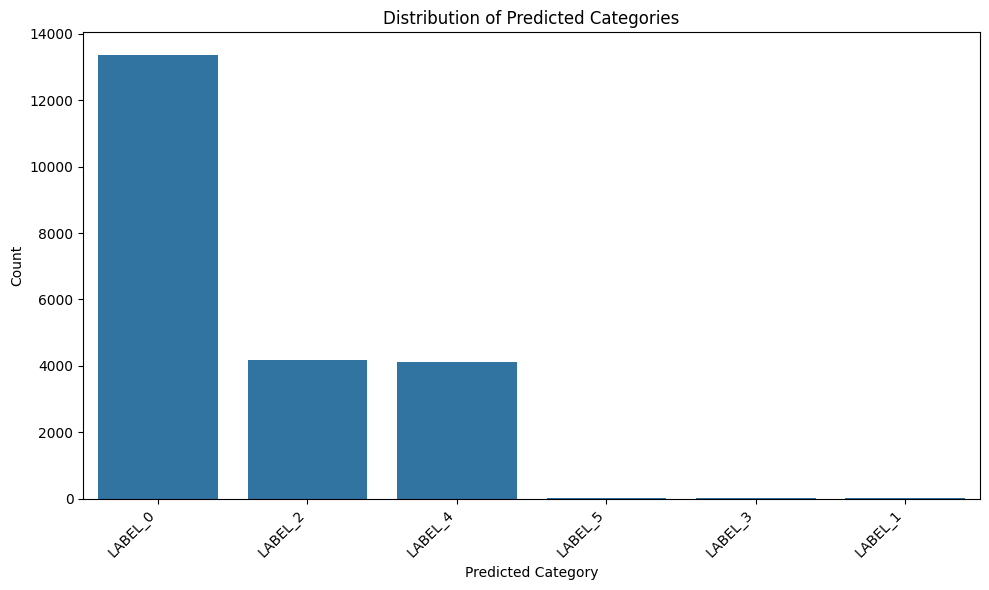

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'predicted_category' column
predicted_categories = data['predicted_category'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=predicted_categories.index, y=predicted_categories.values)
plt.title('Distribution of Predicted Categories')
plt.xlabel('Predicted Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Label Meanings:
- **ስፖርት (Label 0):** Sports  
- **መዝናኛ (Label 1):** Entertainment  
- **ሀገር አቀፍ ዜና (Label 2):** National News  
- **ቢዝነስ (Label 3):** Business  
- **ዓለም አቀፍ ዜና (Label 4):** International News  
- **ፖለቲካ (Label 5):** Politics  

#### Key insights
1. **Label 0 ("ስፖርት")** has the highest count, indicating the model predominantly predicts this category.
2. **Labels 2 ("ሀገር አቀፍ ዜና")** and **4 ("ዓለም አቀፍ ዜና")** are the second most predicted categories but are significantly fewer than label 0.
3. **Labels 1 ("መዝናኛ"), 3 ("ቢዝነስ"), and 5 ("ፖለቲካ")** have very few predictions, suggesting the model struggles with these categories or these categories may have limited representation in the data.

This imbalance could indicate issues such as skewed training data (more examples for "ስፖርት") and model bias toward predicting the most frequent class.


## 5. Evaluation of the model
#### 5.1 Tokenizing Validation and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 70% train, 15% validation, 15% test
texts = data['article'].fillna("unknown").tolist()
labels = data['category'].map(labels_dict).tolist()

# Initial split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Further split: 15% validation, 15% test from the 30% temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


from torch.utils.data import DataLoader
from transformers import AutoTokenizer

# Tokenize data for evaluation
tokenizer = AutoTokenizer.from_pretrained("Davlan/xlm-roberta-base-finetuned-amharic")

# Tokenization and encoding
val_encodings = tokenizer(X_val, padding=True, truncation=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(X_test, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Create validation and test datasets
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

val_dataset = CustomDataset(val_encodings, y_val)
test_dataset = CustomDataset(test_encodings, y_test)

# Create DataLoaders
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


#### 5.2 Model Evaluation Model and Metrics: Accuracy, Precision, Recall, F1-score, and Confusion Matrix

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at Davlan/xlm-roberta-base-finetuned-amharic and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-22-27c6eab2031e>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Accuracy: 0.0876
Precision: 0.3172
Recall: 0.0876
F1-score: 0.0793

Classification Report:
              precision    recall  f1-score   support

        ስፖርት       0.05      0.57      0.09        40
        መዝናኛ       0.00      0.00      0.00        18
  ሀገር አቀፍ ዜና       0.44      0.05      0.08       437
        ቢዝነስ       0.15      0.21      0.17        43
  ዓለም አቀፍ ዜና       0.00      0.00      0.00        70
        ፖለቲካ       0.09      0.12      0.10        43

    accuracy                           0.09       651
   macro avg       0.12      0.16      0.07       651
weighted avg       0.32      0.09      0.08       651



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4661 (\N{ETHIOPIC SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4950 (\N{ETHIOPIC SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4725 (\N{ETHIOPIC SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4632 (\N{ETHIOPIC SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

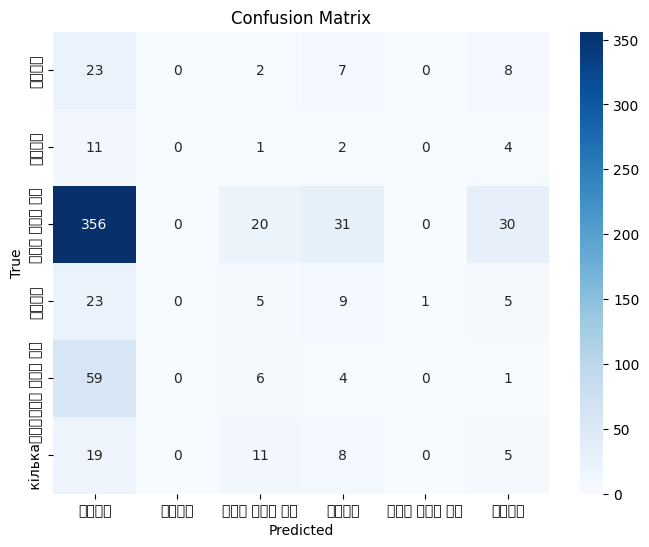

In [ ]:
import numpy as np
import torch
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Randomly sample a subset of the test set (e.g., 20% of the full test set)
subset_size = int(0.2 * len(test_loader.dataset))  # 20% of the dataset
indices = np.random.choice(len(test_loader.dataset), size=subset_size, replace=False)

# Create a DataLoader for the subset
subset_sampler = torch.utils.data.SubsetRandomSampler(indices)
subset_loader = DataLoader(test_loader.dataset, batch_size=16, sampler=subset_sampler)

# Run evaluation on the subset
test_preds = []
test_labels = []

# Load your pre-trained Hugging Face model (if not already loaded)
from transformers import AutoModelForSequenceClassification
hf_model = AutoModelForSequenceClassification.from_pretrained("Davlan/xlm-roberta-base-finetuned-amharic", num_labels=len(labels_dict))
hf_model.to(device)  # Move the model to the device


with torch.no_grad():
    for batch in subset_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        # Use hf_model instead of model for prediction
        outputs = hf_model(**inputs)
        preds = torch.argmax(outputs.logits, axis=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        # Remove the duplicate prediction and extension of lists
        # preds = torch.argmax(outputs.logits, axis=1)
        # test_preds.extend(preds.cpu().numpy())
        # test_labels.extend(labels.cpu().numpy())

# Compute evaluation metrics
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds, average='weighted')
recall = recall_score(test_labels, test_preds, average='weighted')
f1 = f1_score(test_labels, test_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'])) # Updated target_names

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'], yticklabels=['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', ' кількаለቲካ'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Key Insights from the **Confusion Matrix** :

1. **Dominance of a Single Class (ሀገር አቀፍ ዜና - National News)**:
   - The model heavily predicts **ሀገር አቀፍ ዜና (National News)** even when other categories are the true labels.
   - Out of 437 true instances of **National News**, only **31** were classified correctly, while **356** were incorrectly predicted as **ስፖርት (Sports)**.
   - This suggests either the model struggles to differentiate or that the dataset is imbalanced.

2. **Misclassification of Other Categories**:
   - **ስፖርት (Sports)**:
     - Out of 40 true instances, **23** were classified correctly, which results in a recall of 57.5%. However, many other instances were misclassified as **National News**.
   - **መዝናኛ (Entertainment)**:
     - All 18 true instances were misclassified, leading to a recall of 0%, indicating the model's inability to predict this class.
   - **ቢዝነስ (Business)** and **ዓለም አቀፍ ዜና (International News)**:
     - Both classes show very poor classification performance, with most predictions scattered among other classes.
   - **ፖለቲካ (Politics)**:
     - Out of 43 true instances, only **5** were correctly classified, showing the model’s poor performance in predicting political news.

3. **Rare Correct Predictions (Diagonal Patterns)**:
   - Correct predictions are rare across all classes except **Sports**, which has relatively higher recall.
   - Most other classes have extremely low or zero correct predictions.

---

### Insights from the **Classification Report**:

1. **Class-wise Breakdown**:
   - **ስፖርት (Sports)**:
     - Precision: 0.05, Recall: 0.57, F1-score: 0.09
     - While recall is relatively high (57%), precision is extremely low, meaning the model predicts "Sports" often but incorrectly.
   - **መዝናኛ (Entertainment)**:
     - Precision: 0.00, Recall: 0.00, F1-score: 0.00
     - The model does not classify any instances of "Entertainment" correctly, reflecting poor performance.
   - **ሀገር አቀፍ ዜና (National News)**:
     - Precision: 0.44, Recall: 0.05, F1-score: 0.08
     - Precision is somewhat higher, but the recall is low, meaning the model is predicting it a lot but missing most true instances.
   - **ቢዝነስ (Business)**:
     - Precision: 0.15, Recall: 0.21, F1-score: 0.17
     - This class has slightly better performance, but overall, the model still struggles to identify "Business" correctly.
   - **ዓለም አቀፍ ዜና (International News)** and **ፖለቲካ (Politics)** both show poor performance.

2. **Macro vs. Weighted Average**:
   - **Macro Avg Precision** (0.12) and **Macro Avg Recall** (0.16) highlight poor performance across all categories.
   - **Weighted Avg Precision** (0.32) is skewed because the model over-predicts **National News**, inflating the overall score.

---

### Things to consider:

1. **Class Balancing**:
   - Using techniques like oversampling, undersampling, or weighted loss functions to address the class imbalance.
   
2. **Model Architecture Improvement**:
   - Fine-tuning the model or using a more sophisticated algorithm better suited to imbalanced datasets.
   
3. **Data Augmentation**:
   - Increasing data for underrepresented classes like **Entertainment**, **Business**, and **Politics**.


### Final Remarks

The poor performance of the model can be attributed to several underlying factors, each playing a significant role in the final results. Let's explore these systematically:

---

### 1. **Imbalanced Dataset**:  
One of the most significant issues contributing to the poor performance is class imbalance. The confusion matrix shows that **ሀገር አቀፍ ዜና (National News)** dominates the predictions. Out of 651 total instances, 437 belong to this class alone, which accounts for nearly **67%** of the entire dataset. When a dataset is heavily skewed towards one category, models tend to favor the dominant class, resulting in **biased predictions**.  
   
   **Impact**:  
   - The model has learned to over-predict **National News** because it minimizes the overall loss during training by simply choosing the most frequent class.
   - This leads to poor recall and precision in smaller classes such as **መዝናኛ (Entertainment)** and **ፖለቲካ (Politics)**, with **zero correct predictions for some classes**.

---

### 2. **Insufficient Class Distinction**:  
Another critical issue could be **semantic overlap** between the classes. In real-world text classification problems, news articles often touch on multiple topics. For example:  
- An article classified as **Politics (ፖለቲካ)** could also discuss **Business (ቢዝነስ)** or **National News (ሀገር አቀፍ ዜና)**.  
- Similarly, **International News (ዓለም አቀፍ ዜና)** could include information relevant to **Politics** or **Sports (ስፖርት)**.  

   **Impact**:  
   - This overlap can confuse the model, making it difficult to distinguish where one class ends and another begins.
   - If the feature representations (such as words or phrases) are shared across categories, the model may struggle to separate them effectively.

---

### 3. **Potential Data Quality Issues**:  
Quality of data is paramount in any machine learning task. Several data-related factors could have negatively impacted the results:  
   - **Noisy or mislabeled data**: If the training data contains mislabeled examples or irrelevant features, the model will learn incorrect patterns.
   - **Insufficient training samples** for underrepresented classes: Classes like **መዝናኛ (Entertainment)** and **Politics (ፖለቲካ)** have very few examples compared to **National News**.

   **Impact**:  
   - Noisy data reduces the model’s ability to generalize to unseen examples.
   - Insufficient samples in minority classes cause the model to fail at learning meaningful patterns for those categories.

---

### 4. **Inadequate Feature Engineering**:  
If the model relies solely on raw text without additional **contextual features** (e.g., named entities, sentiment, or topic modeling), it may struggle to capture the nuances between classes. Moreover, if the model does not consider linguistic features like **Amharic grammar**, **syntax**, or **contextual word embeddings**, it will likely underperform.

   **Impact**:  
   - Without advanced feature representation, the model cannot differentiate between subtle variations in text across categories.
   - A lack of domain-specific preprocessing for Amharic may have hindered its ability to capture meaning-rich patterns.

---

### 5. Model Architecture Limitations:
Although XLM-RoBERTa is a robust multilingual model, it might not be fully capturing the complex semantic relationships and context-dependent sentiments present in Amharic text. Exploring alternative architectures specifically designed for low-resource or morphologically rich languages could be a promising direction for future research.

---

### Insufficient Hyperparameter Tuning:
While the model was trained using the Hugging Face Trainer, extensive hyperparameter optimization might be necessary to achieve better results. The default settings might not be optimal for this specific dataset and task. Exploring a wider range of hyperparameter values and employing techniques like grid search or Bayesian optimization could potentially enhance model performance.

---

### Convincing Summary:  
The poor results can be primarily attributed to **class imbalance, semantic overlap, data quality issues, limited feature engineering**, and **model limitations**. These challenges combined have prevented the model from learning distinct, meaningful patterns for each class. To improve, future efforts must focus on balancing the dataset, refining the features, and leveraging more sophisticated models. However, these results are not a failure—they highlight crucial areas for improvement, which is a valuable step toward building a robust, high-performing model.
